<a href="https://colab.research.google.com/github/ferit-osirv/lab6/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6 -  Feature and Object Detection

Ove laboratorijske vježbe se rješavaju u Google Colabu i spremaju na GitHub repozitorij koji je povezan na GitHub Classroom.

## Kako riješiti zadatke?

1. Prihvatite zadatak putem Google Classroom linka koji ćete dobiti. Google Classroom će kreirati repozitorij na vašem računu.
2. Uđite u novokreiran repozitorij na vašem računu i kliknite na **.ipynb** datoteku, zatim kliknite **Open in Colab**.
3. Zadatke rješavate u Google Colabu.

## Kako spremiti (predati) zadatke?

1. Unutar **Google Colaba** kliknite na **Open settings** kotačić u gornjem desnom kutu.
2. Kliknite na **GitHub** tab i odaberite kvačicu za **Access private repositories and organizations**.
3. Otvorit će se novi prozor da dodate pristup GitHubu. Kod **ferit-osirv** kliknite **Grant**.  
4. Spremite i izađite iz postavki.


5. Kliknite na **File > Save a copy in GitHub**.
6. Odaberite kreiran repozitorij labosa **koji uključuje vaše ime**.

> *Napomena:* Korake 1-4 morate napraviti samo prvi put.

## Kopiranje datoteka iz GitHub repozitorija

Za izradu vježbi bit će vam potrebne slike i druge datoteke koje će se nalaziti u GitHub repozitoriju vježbe. Ovakva komanda će biti dostupna u notebooku svake vježbe. Ona će kopirati datoteke s GitHuba u Google Colab okruženje.

**Ovu komandu je potrebno pokrenuti prije nego što krenete raditi svaku vježbu.**

In [ ]:
!rm -rf clone && git clone https://github.com/ferit-osirv/lab6 clone && cp -a clone/. .


Cloning into 'clone'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (14/14), 1.19 MiB | 7.76 MiB/s, done.
Resolving deltas: 100% (2/2), done.


**Google Colab će povremeno obrisati sve datoteke.** Tako da će možda biti potrebno ponovno pokrenuti ovu komandu između dvije sesije. Ako dobivate greške da datoteke ne postoje, probajte ponovno pokrenuti gornju komandu.

# Introduction

In this lab we will cover two topics: advanced feature detection extraction algorithms and object detection (using traditional image processing methods).

Feature extraction is a process of dimensionality reduction by which an initial set of raw data is reduced to more manageable groups for processing. A characteristic of these large data sets is a large number of variables that require a lot of computing resources to process. Feature extraction is the name for methods that select and /or combine variables into features, effectively reducing the amount of data that must be processed, while still accurately and completely describing the original data set.

Object detection is a technique that works to identify and locate objects within an image or video. In this way it provides better understanding and analisys of scenes in images and videos. Specifically, object detection draws bounding boxes around these detected objects, which allow us to locate where said objects are in (or how they move through) a given scene. With this kind of identification and localization, object detection can be used to count objects in a scene and determine and track their precise locations, all while accurately labeling them.



# Feature Detection and Extraction

What is feature?
A local image feature is a tiny patch in the image that's invariant to image scaling, rotation and change in illumination.
It's like the tip of a tower, or the corner of a window in the image above. Unlike a random point on the background (sky) in the image above,
the tip of the tower can be precise detected in most images of the same scene. It is geometricly (translation, rotation, ...) and photometricly (brightness, exposure, ...) invariant.
A good local feature is like the piece you start with when solving a jigsaw puzzle, except on a much smaller scale.
It's the eye of the cat or the corner of the table, not a piece on a blank wall.
The extracted local features must be:

* Repeatable and precise so they can be extracted from different images showing the same object.
* Distinctive to the image, so images with different structure will not have them.

Due to these requirements, most local feature detectors extract corners and blobs. There is a wealth of algorithms satisfying the above requirements for feature detection (finding interest points on an image) and description
(generating a vector representation for them). They include already learned Harris Corner Detection (in lab 4), and some more advanced algorithms, such as:

* Scale Invariant Feature Transform (SIFT)
* Speeded-Up Robust Features (SURF)
* Features from Accelerated Segment Test (FAST)
* Binary Robust Independent Elementary Features (BRIEF)
* Oriented FAST and rotated BRIEF (ORB)

The SIFT and SURF algorithms are patented by their respective creators, and while they are free to use in academic and research settings, you should technically be obtaining a license/permission from the creators if you are using them in a commercial (i.e. for-profit) application.

Since is a known fact that ORB performs as well as SIFT on the task of feature detection (while outperforms SURF), in this lab, our focus will be on Oriented FAST and rotated BRIED (ORB).

## Oriented FAST and rotated BRIEF (ORB)

Oriented FAST and rotated BRIEF (ORB) is a fast robust local feature detector. It is basically a fusion of FAST keypoint detector and BRIEF descriptor
with many modifications to enhance the performance.

ORB is a fusion of FAST keypoint detector and BRIEF descriptor with some added features to improve the performance. FAST is Features from Accelerated Segment Test used to detect features from the provided image. It also uses a pyramid to produce multiscale-features. Now it doesn’t compute the orientation and descriptors for the features, so this is where BRIEF comes in the role.

ORB uses BRIEF descriptors but as the BRIEF performs poorly with rotation. So what ORB does is to rotate the BRIEF according to the orientation of keypoints. Using the orientation of the patch, its rotation matrix is found and rotates the BRIEF to get the rotated version. ORB is an efficient alternative to SIFT or SURF algorithms used for feature extraction, in computation cost, matching performance, and mainly the patents. SIFT and SURF are patented and you are supposed to pay them for its use. But ORB is not patented.


We’ll start by showing the following figure that shows an example of using ORB to match between real world images with viewpoint change. Green lines are valid matches, red circles indicate unmatched points.

ORB  uses an orientation compensation mechanism, making it rotation invariant while learning the optimal sampling pairs.

### Orientation Compensation

ORB uses a simple measure of corner orientation – the intensity centroid [5]. First, the moments of a patch are defined as:

<p align="center">
  <img src="https://gilscvblog.files.wordpress.com/2013/10/figure2.jpg">
</p>

With these moments we can find the centroid, the “center of mass” of the patch as:

<p align="center">
  <img src="https://gilscvblog.files.wordpress.com/2013/10/figure3.jpg?w=300&h=116">
</p>

We can construct a vector from the corner’s center O, to the centroid -OC. The orientation of the patch is then given by:

<p align="center">
  <img src="https://gilscvblog.files.wordpress.com/2013/10/figure4.jpg?w=300&h=53">
</p>

Here is an illustration to help explain the method:

<p align="center">
  <img src="https://gilscvblog.files.wordpress.com/2013/10/angle.jpg">
</p>


Once we’ve calculated the orientation of the patch, we can rotate it to a canonical rotation and then compute the descriptor, thus obtaining some rotation invariance.

We will now see ORB in action through examples and assigments!

### Try out the following code in order to find corners on the image

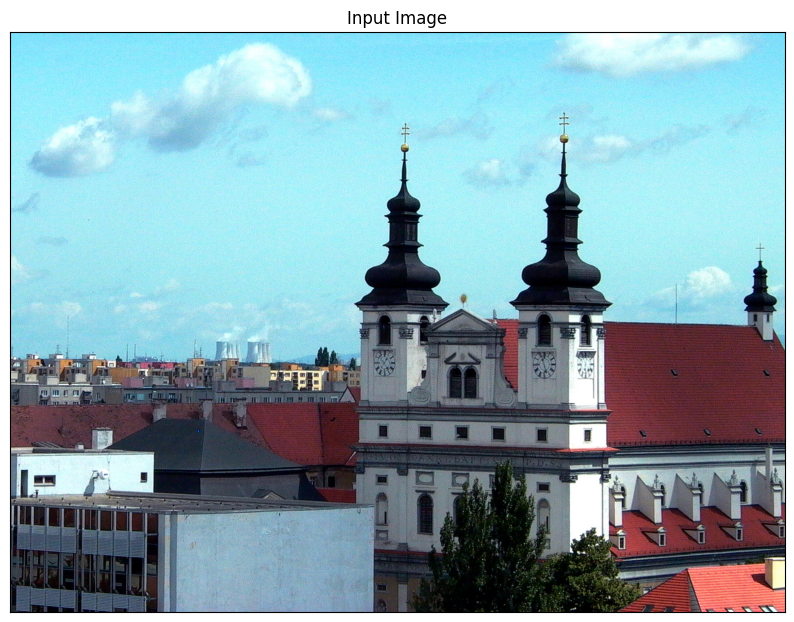

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8] # enlarge inline plots

# load input image
img = cv2.imread('images/building_1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.plot,plt.imshow(img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# create ORB
orb = cv2.ORB_create()
# we can create ORB with specific number of key points we desire, for example, try to set them to 1000
#orb = cv2.ORB_create(1000, 1.2)
key_points, description = orb.detectAndCompute(img, None)
print("Number of keypoints Detected: ", len(key_points))

Number of keypoints Detected:  500


In [ ]:
# draw rich key points on input image
img_keypoints =cv2.drawKeypoints(img,key_points,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

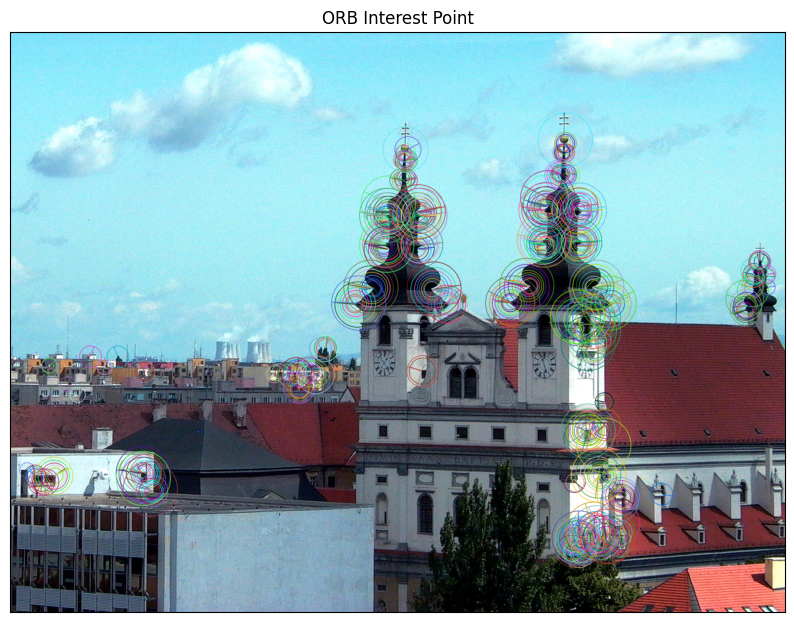

In [ ]:
# draw result image:
plt.plot,plt.imshow(img_keypoints)
plt.title('ORB Interest Point'), plt.xticks([]), plt.yticks([])
plt.show()

The found interest points/features are circled in the image above.
As we can see, some of these points are unique to this scene/building like the points near the top of the two towers. However, others like the ones at the top of the tree may not be distinctive.

In the next assigment, you will try to extract the same features from a different image of the same cathedral taken from a different angle.

### Assigment 1 - Feature Detection with ORB detector

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20] # enlarge inline plots

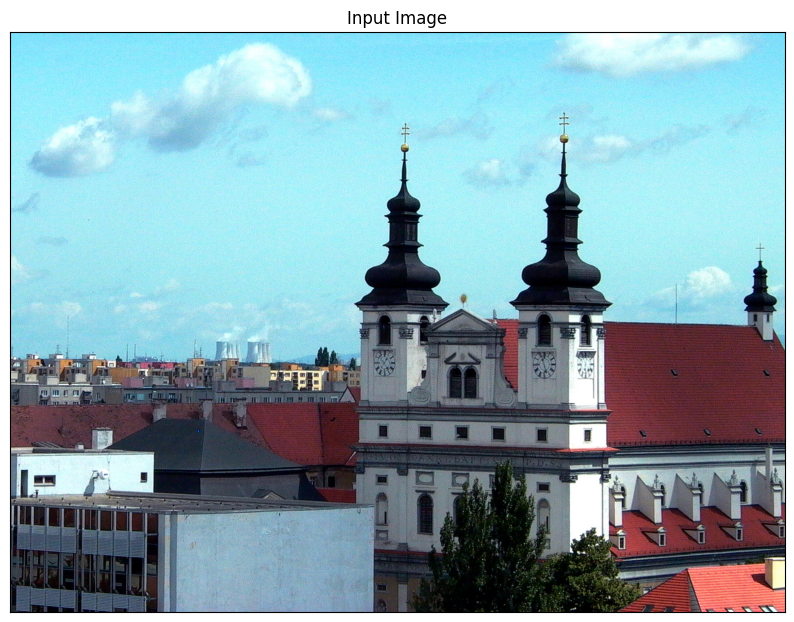

In [ ]:
# load and plot input image named 'building_1.jpg'
#TODO:
img = cv2.imread('images/building_1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.plot,plt.imshow(img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

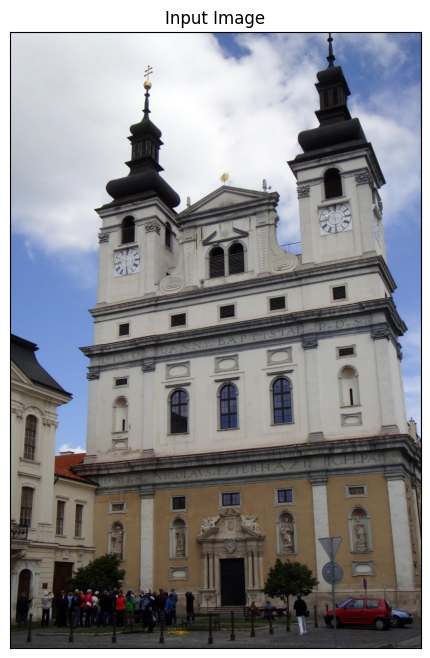

In [ ]:
# load input image named 'building_2.jpg'
#TODO:
img = cv2.imread('images/building_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.plot,plt.imshow(img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

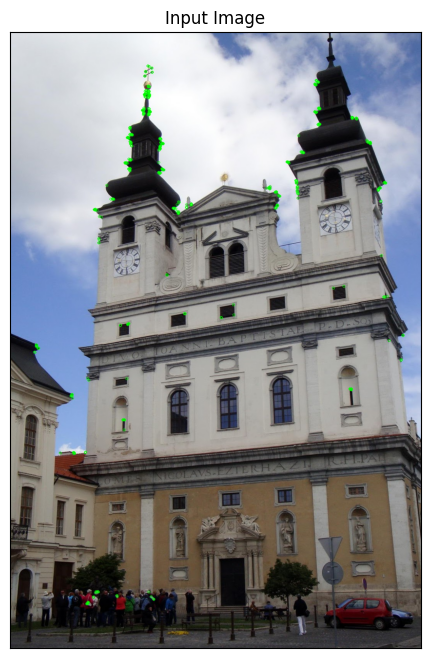

In [ ]:
# create ORB detector
#TODO:
orb = cv2.ORB_create()
# find keypoints and their descriptors
#TODO:
key_points, description = orb.detectAndCompute(img, None)
# draw rich key points on input image
#TODO:
img_keypoints = cv2.drawKeypoints(img, key_points, None, color=(0, 255, 0), flags=0)

# Display the result
plt.plot,plt.imshow(img_keypoints)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# feature extraction function
def image_detect_and_compute(detector, img_name):
    # detect and compute intetrest points and their descriptors
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = detector.detectAndCompute(img, None)
    return img, kp, des

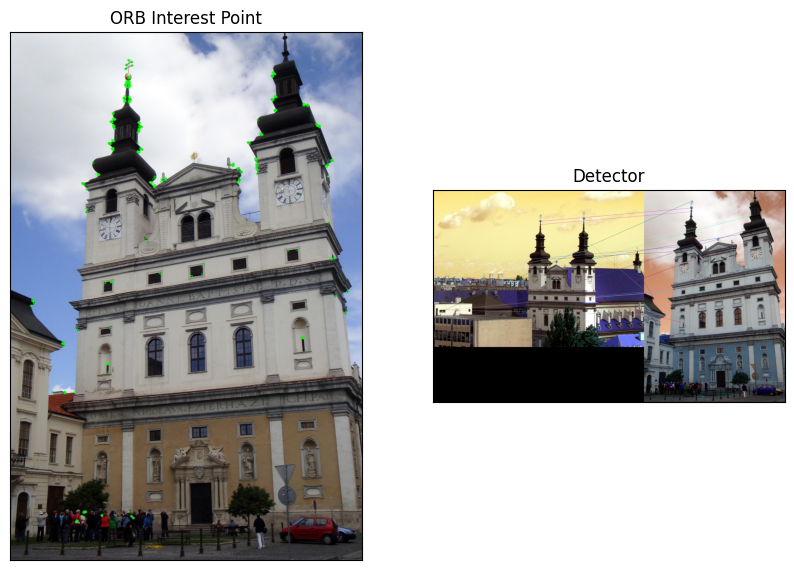

In [ ]:
def draw_image_matches(detector, img1_name, img2_name, nmatches=20):
    # draw ORB feature matches of the given two images, using previously defined function
    # TODO:
    img1 = cv2.imread('images/building_1.jpg', cv2.IMREAD_COLOR)
    img2 = cv2.imread('images/building_2.jpg', cv2.IMREAD_COLOR)

    # Find keypoints using the detector
    kp1 = detector.detect(img1, None)
    kp2 = detector.detect(img2, None)

    # Compute descriptors
    _, des1 = detector.compute(img1, kp1)
    _, des2 = detector.compute(img2, kp2)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance)
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches],img2, flags=2)
    # draw result images
    plt.subplot(121),plt.imshow(img_keypoints)
    plt.title('ORB Interest Point'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img_matches)
    plt.title('Detector'), plt.xticks([]), plt.yticks([])
    plt.show()
# draw image matches
orb = cv2.ORB_create()
draw_image_matches(orb, 'images/building_1.jpg','images/building_2.jpg')


# Object detection algorithms (P1)

Broadly speaking, object detection can be broken down into 'traditional' image processing methods, and deep learning-based approaches.

In more traditional based approaches, computer vision techniques are used to look at various features of an image, such as the color histogram or edges, to identify groups of pixels that may belong to an object.

On the other hand, deep learning-based approaches employ convolutional neural networks (CNNs) to perform end-to-end, unsupervised object detection, in which features don’t need to be defined and extracted separately.

For now, in this lab we will focus on traditional image detection methods, while deep learning methods which have become the state-of-the-art approaches for object detection, will be covered in further laboratory excersises.

## Template Matching Algorithm

Template Matching is a method for searching and finding the location of a template image in a larger image.

In OpenCV, template matching is implemented inside ```cv2.matchTemplate``` function.

So what exactly is the ```cv2.matchTemplate``` function doing? Essentially, this function takes a “sliding window” of our query image and slides it across our puzzle image from left to right and top to bottom, one pixel at a time. Then, for each of these locations, we compute the correlation coefficient to determine how “good” or “bad” the match is.

Regions with sufficiently high correlation can be considered “matches” for our image template. There are a variety of methods to perform template matching,
based on different correlation coefficients.

Definitions of different correlation coefficients can be found at:
https://docs.opencv.org/2.4/modules/imgproc/doc/object_detection.html




### Assigment 2 - Object detection using template matching

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8] # enlarge inline plots
from google.colab.patches import cv2_imshow

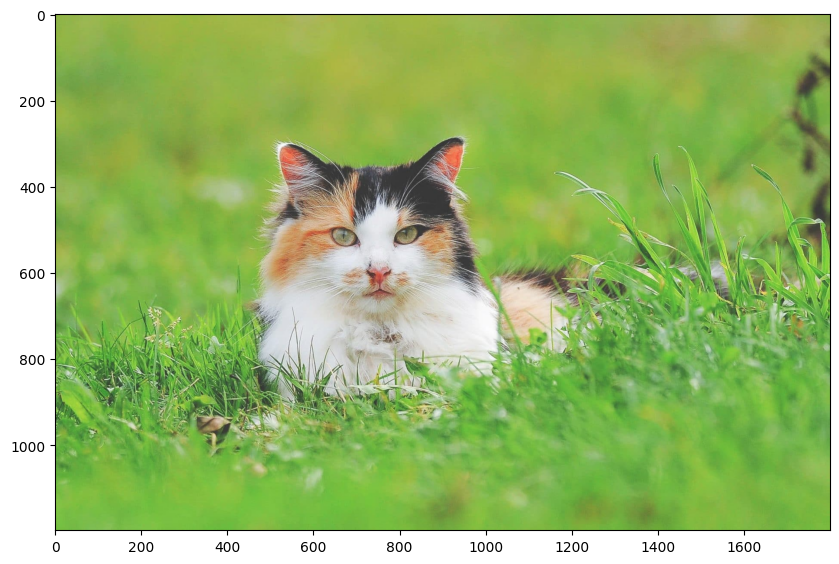

In [ ]:
# Load full input image
full = cv2.imread('images/cat.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

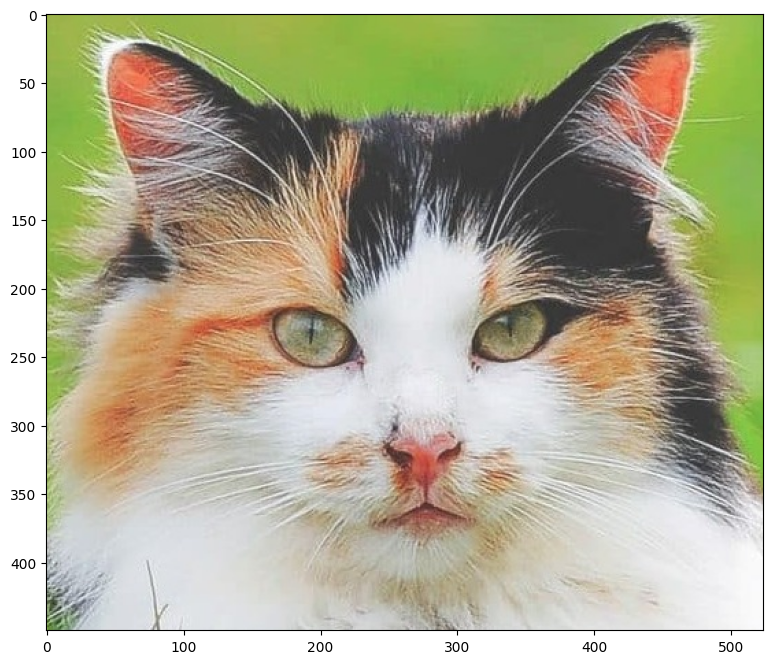

In [ ]:
# Load Template image
# This is a subset of the previous image, note how its actually the exact image
template = cv2.imread('images/cat_face.jpg')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
plt.imshow(template)

In [ ]:
height, width,channels = template.shape

In [ ]:
# Define 6 different template matching methods
# TODO:
methods = [
    cv2.TM_CCOEFF,
    cv2.TM_CCOEFF_NORMED,
    cv2.TM_CCORR,
    cv2.TM_CCORR_NORMED,
    cv2.TM_SQDIFF,
    cv2.TM_SQDIFF_NORMED
]

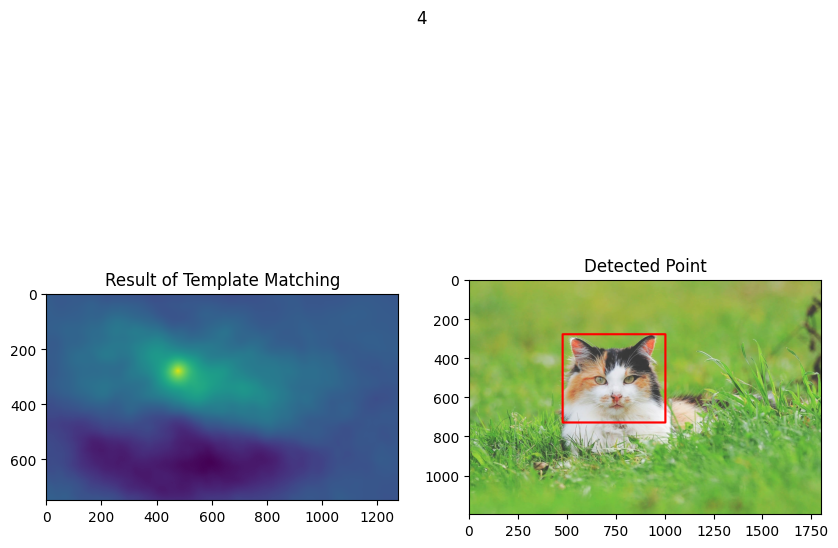

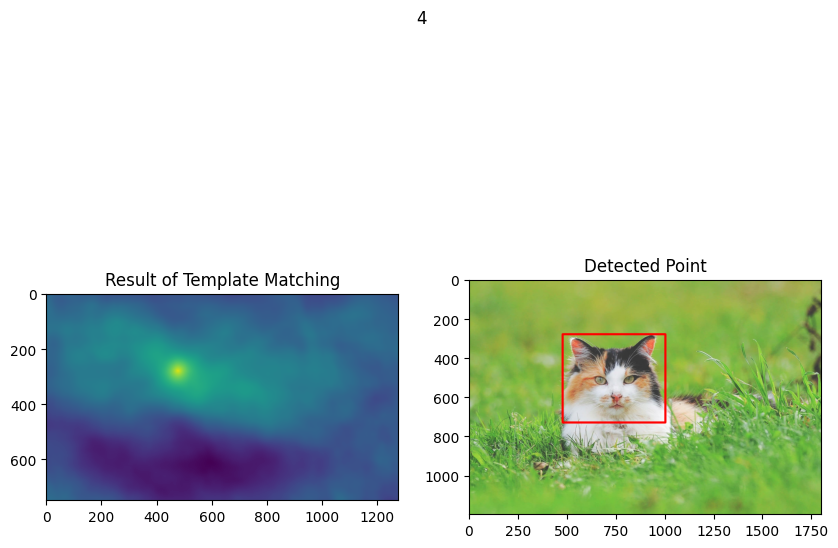

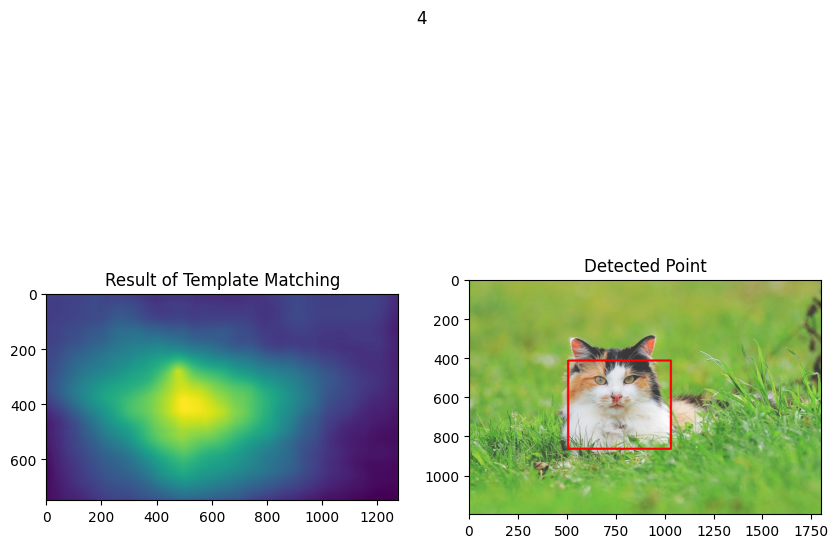

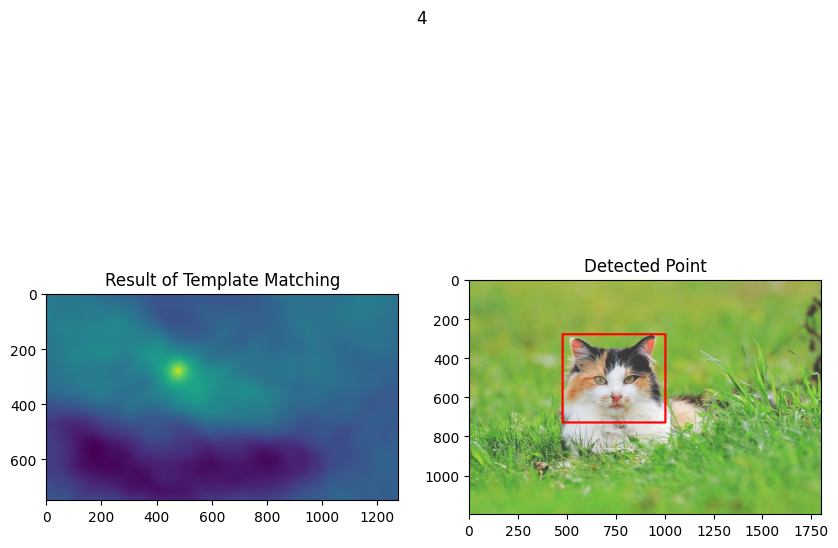

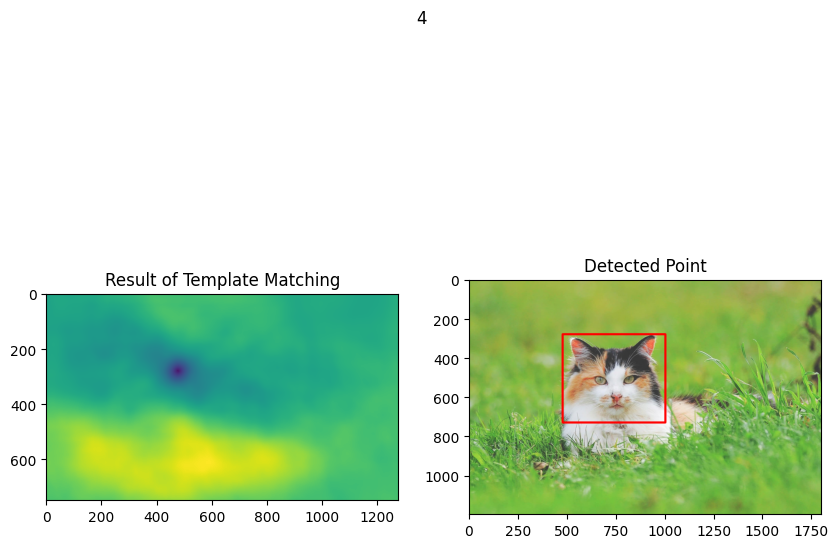

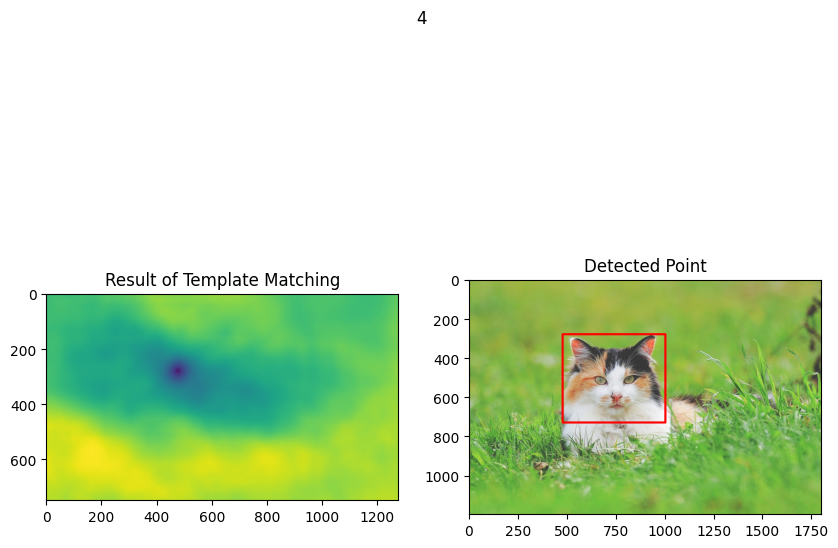

In [ ]:
for method in methods:

    # Create a copy of the image
    full_copy = full.copy()

    # Get the actual function instead of the string


    # apply template matching algorithm
    res = cv2.matchTemplate(full_copy,template,method)

    # grab the Max and Min values, plus their locations
    #TODO:
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # if the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
      top_left = min_loc
    #TODO:
    else:
      top_left = max_loc
    #TODO:

    # assign the bottom right of the rectangle
    height, width, _ = template.shape
    bottom_right = (top_left[0] + width, top_left[1] + height)
    # draw the red rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(1,2,1)
    plt.imshow(res)
    plt.title('Result of Template Matching')

    plt.subplot(1,2,2)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    plt.show()

In [ ]:
Ne zaboravite spremiti zadatke na GitHub!